In [ ]:
pip install folium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})



In [3]:
df = pd.read_csv('C:/Users/james/Downloads/houseprice.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
def adjustedR2 (r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [6]:
train_data, test_data = train_test_split(df,train_size=0.8, random_state=3)

In [7]:

lr = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living'],dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'],dtype = pd.Series)
lr.fit(x_train,y_train)

x_test = np.array(test_data['sqft_living'],dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'],dtype = pd.Series)

pred = lr.predict(x_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(x_train,y_train),'.3f'))
rtesm = float(format(lr.score(x_test,y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print('average price for test data:{:.3f}'.format(y_test.mean()))
print('intercept:{}'.format(lr.intercept_))
print('coefficient:{}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation


average price for test data:539823.330
intercept:-47531.56342676887
coefficient:[282.43587696]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,254437.749,0.492,-,0.496,-,0.491


In [8]:
sns.set(style='white', font_scale=1)

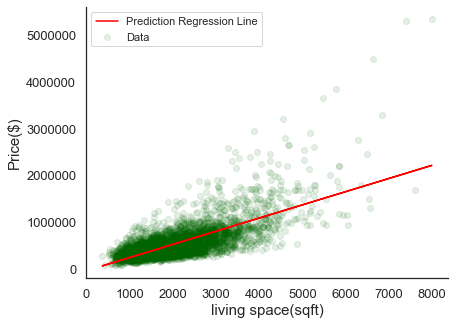

In [9]:
plt.figure(figsize=(6.5,5))
plt.scatter(x_test,y_test,color='darkgreen', label='Data', alpha=0.1)
plt.plot(x_test,lr.predict(x_test), color='Red', label= 'Prediction Regression Line')
plt.xlabel('living space(sqft)', fontsize=15)
plt.ylabel('Price($)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

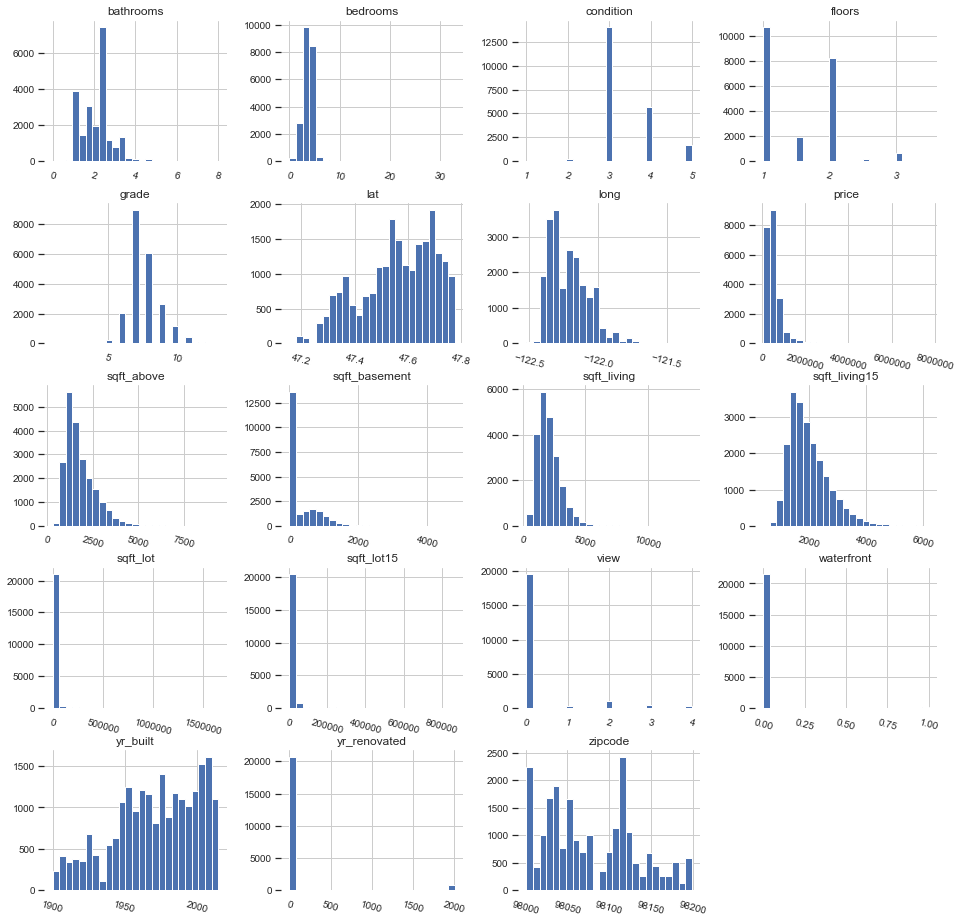

In [10]:
df1 = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25, figsize=(16,16), xlabelsize='10', ylabelsize='10', xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [11]:
sns.set(style='whitegrid', font_scale=1)

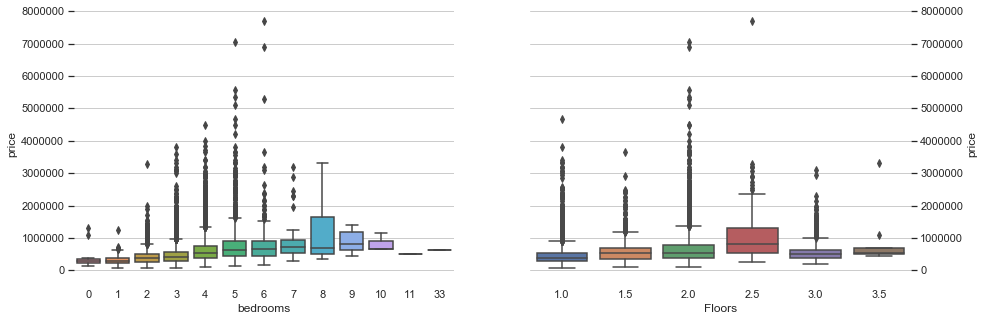

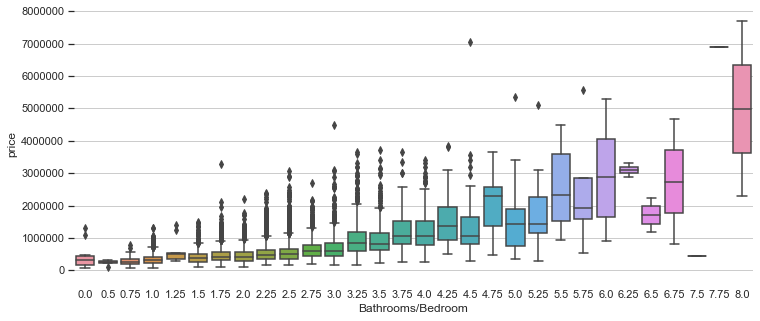

In [12]:
f, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=df['bedrooms'], y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'], y=df['price'], ax=axes[1])
sns.despine(left=True , bottom=True)
axes[0].set(xlabel='bedrooms', ylabel='price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors',ylabel='price')

f, axe= plt.subplots(1,1,figsize=(12.18,5))
sns.despine(left='True', bottom='True')
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms/Bedroom', ylabel='price');

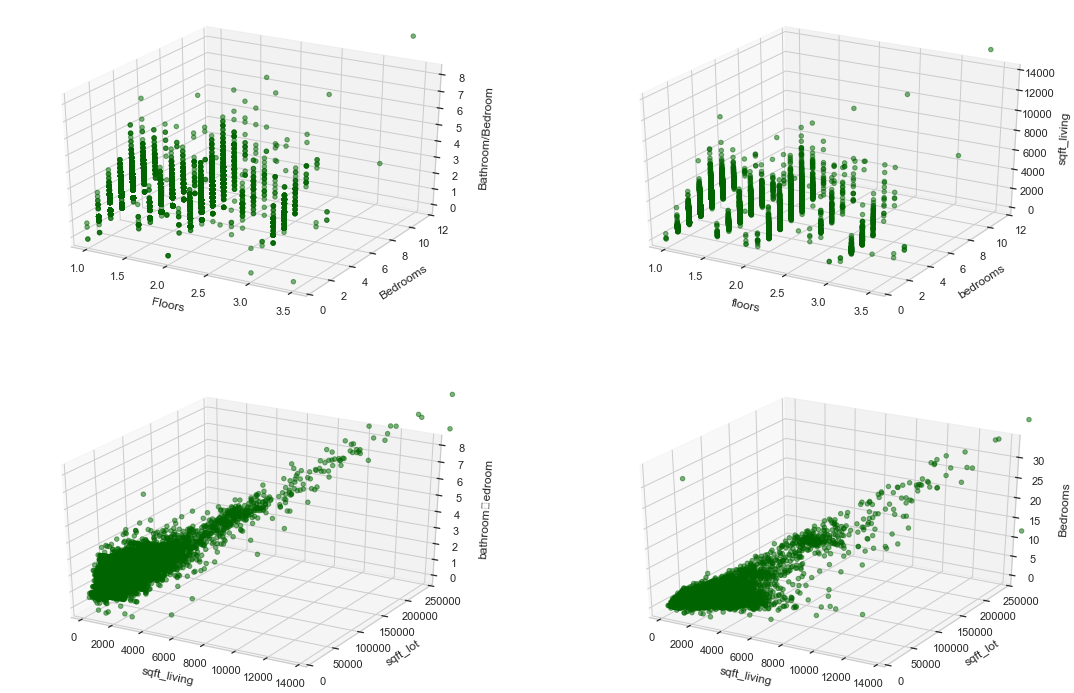

In [13]:
fig = plt.figure(figsize=(19,12.5))
ax = fig.add_subplot(2,2,1, projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],color='darkgreen',alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathroom/Bedroom')
ax.set(ylim=[0,12])

ax = fig.add_subplot(2,2,2, projection='3d')
ax.scatter(df['floors'], df['bedrooms'], df['sqft_living'], color='darkgreen', alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft_living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'], color='darkgreen', alpha=.5)
ax.set(xlabel='\nsqft_living',ylabel='\nsqft_lot',zlabel='\nbathroom\bedroom')
ax.set(ylim=[0,250000])

ax= fig.add_subplot(2,2,4, projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],color='darkgreen', alpha=.5)
ax.set(xlabel='\nsqft_living',ylabel='\nsqft_lot',zlabel='\nBedrooms')
ax.set(ylim=[0,250000]);

[Text(0, 0.5, 'price'), Text(0.5, 0, 'Grade')]

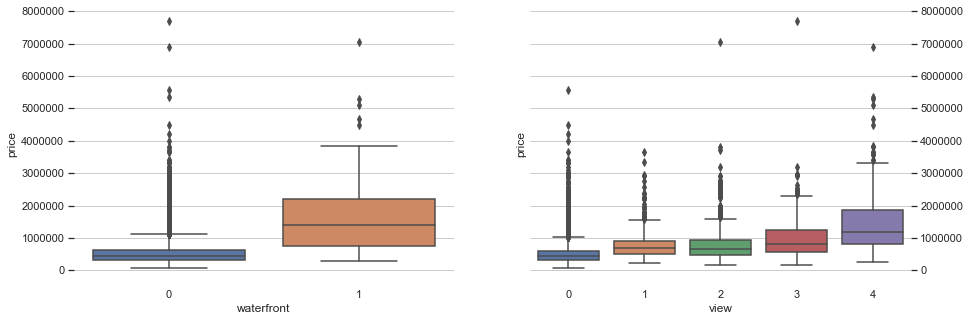

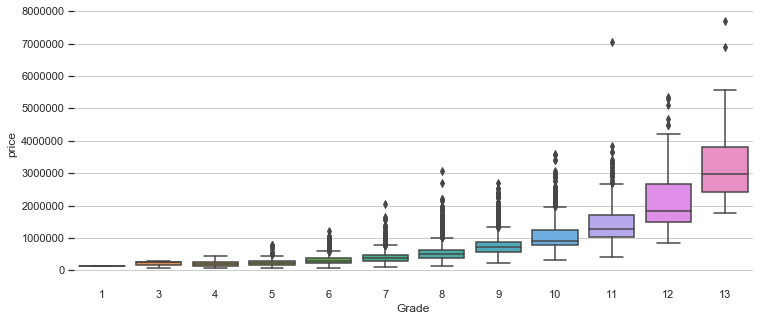

In [15]:
f, axes=plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'],ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'],ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='waterfront',ylabel='price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position='Right'
axes[1].yaxis.tick_right()
axes[1].set(xlabel='view',ylabel='price')

f,axe=plt.subplots(1,1, figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade',ylabel='price')


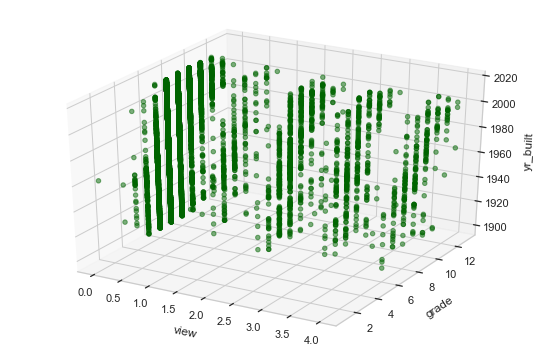

In [16]:
fig= plt.figure(figsize=(9.5,6.25))
ax=fig.add_subplot(1,1,1, projection='3d')
ax.scatter(train_data['view'],train_data['grade'],train_data['yr_built'], color='darkgreen', alpha=.5)
ax.set(xlabel='\nview',ylabel='\ngrade',zlabel='\nyr_built');

In [17]:
maxpr = df.loc[df['price'].idxmax()]
def generateBaseMap (default_location=[47.5112, -122.257], default_zoom_start=9.4):
    
    base_map=folium.Map(location=default_location, control_scale=True,zoom_start=default_zoom_start)
    return base_map

df_copy= df.copy()
df_copy['count'] = 1
basemap = generateBaseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s= folium.FeatureGroup(name='icon').add_to(basemap)

folium.Marker([maxpr['lat'],maxpr['long']], popup ='Highest Price:$'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
       radius=8, max_zoom=13,name='Heat Map').add_to(basemap)

folium.LayerControl(collapsed=False).add_to(basemap)
basemap

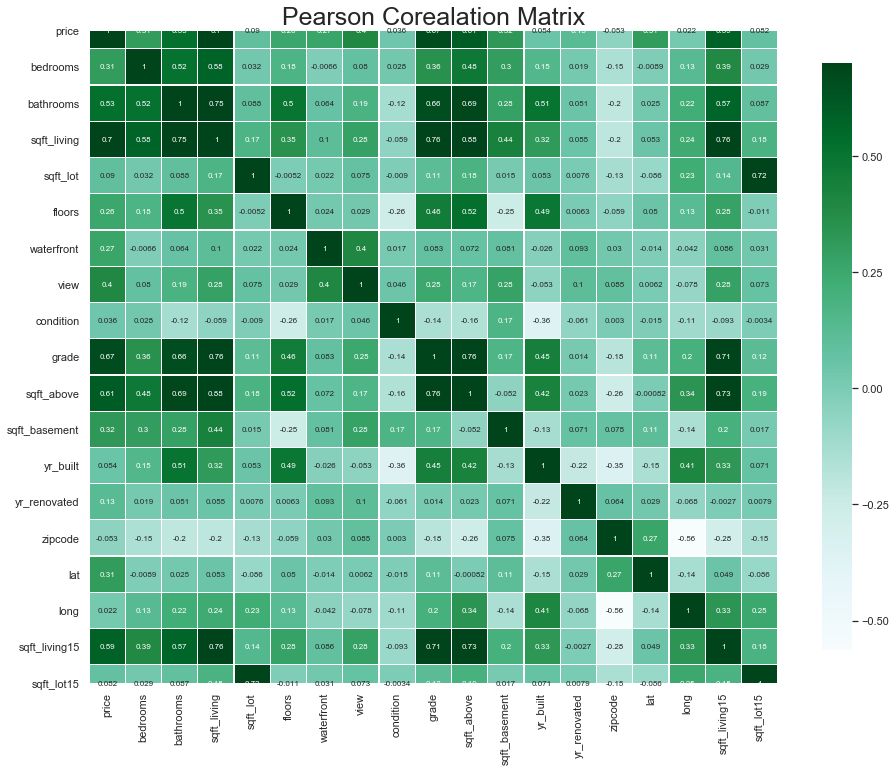

In [18]:
features =['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
mask = np.zeros_like(df[features].corr(),dtype=np.bool)
f, ax= plt.subplots(figsize=(16,12))
plt.title('Pearson Corealation Matrix', fontsize=25)
sns.heatmap(df[features].corr(), linewidth=0.25, vmax=0.7,square= True,cmap='BuGn',linecolor='w',
            annot=True,annot_kws={'size':8}, mask=mask, cbar_kws={'shrink':.9});


In [19]:
df_dm= df.copy()
df_dm.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


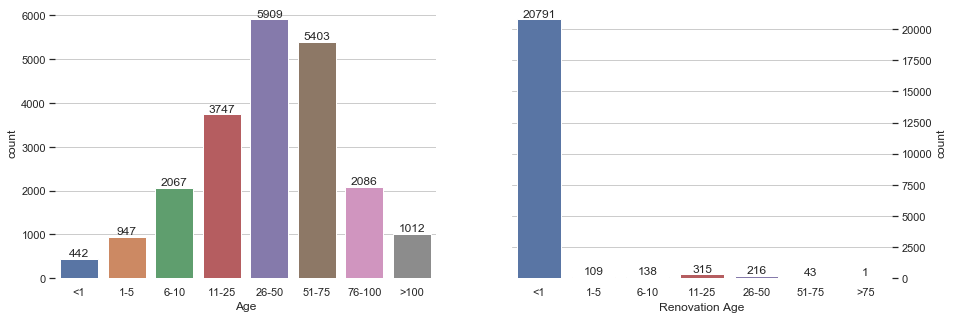

In [20]:
df_dm['sales_yr'] = df_dm['date'].astype(str).str[:4]
df_dm['age'] =df_dm['sales_yr'].astype(int)-df_dm['yr_built']
df_dm['age_rnv']=0
df_dm['age_rnv'] = df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int) -df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

bins=[-2, 0, 5, 10,25, 50 , 75, 100, 100000]
labels=['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned']= pd.cut(df_dm['age'], bins=bins, labels=labels)

bins =[-2,0,5,10,25,50,75,100000]
labels=['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

f, axes = plt.subplots(1,2, figsize=(15,5))
p1 = sns.countplot(df_dm['age_binned'], ax = axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+ p.get_width()/2,height+50,height,ha='center')
    
p2=sns.countplot(df_dm['age_rnv_binned'], ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height+200, height, ha='center')
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

df_dm = pd.get_dummies(df_dm, columns=['age_binned', 'age_rnv_binned'])


In [21]:
train_data_dm, test_data_dm = train_test_split(df_dm, train_size=0.8, random_state=3)

features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features], train_data_dm['price'])

print('intercept :{}'.format(complex_model_1.intercept_))
print('coefficient :{}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'], pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features], train_data_dm['price']), '.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features], test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_dm[features], df_dm['price'], cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features', rmsecm, rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending = False)


intercept :-57289414.99458996
coefficient :[-5.69448823e+04  1.13504772e+04  3.18609534e+02 -2.91056622e-01
 -5.81807012e+03  5.84715382e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254437.749,0.492,-,0.496,-,0.491


In [22]:
# multiple regression - II


features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept :{}'.format(complex_model_2.intercept_))
print('Coefficiet:{}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(test_data_dm[features], test_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features], test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(train_data_dm[features], train_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r= evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by='5-Fold Cross Validation', ascending=False)

Intercept :14914402.737084514
Coefficiet:[-3.74862318e+04  4.83935681e+04  1.71784897e+02 -2.31321046e-01
  1.03548284e+04  5.56414363e+05  4.79049661e+04  1.24241940e+05
 -8.88973485e+04 -1.05897212e+05 -1.04783195e+05 -1.35973525e+05
 -5.37512681e+04  8.41812470e+04  1.84256092e+05  2.20865209e+05
 -1.59875071e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,selected features,209832.557,0.657,0.656,0.652,0.652,0.648
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254437.749,0.492,-,0.496,-,0.491


In [23]:
#multiple regression -2
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data_dm[features],train_data['price'])

print('Intercept :{}'.format(complex_model_3.intercept_))
print('Coefficients :{}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm= float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm= float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df[features],df['price'],cv=5).mean(),'.3f'))

r=evaluation.shape[0]
evaluation.loc[r]=['Multiple Regression-3','all features,no preprocessing',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending = False)


Intercept :7561473.29886485
Coefficients :[-3.51672008e+04  4.26213118e+04  1.10776801e+02  1.13367200e-01
  6.82764823e+03  5.61916155e+05  5.28811479e+04  2.49198871e+04
  9.58660245e+04  7.02387717e+01  4.05380291e+01 -2.71165435e+03
  2.26743708e+01 -5.80529156e+02  5.98722304e+05 -2.09107231e+05
  2.32792585e+01 -3.75114599e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
3,Multiple Regression-3,"all features,no preprocessing",193817.972,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression-2,selected features,209832.557,0.657,0.656,0.652,0.652,0.648
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254437.749,0.492,-,0.496,-,0.491


In [24]:
#multiple regression-4

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

complex_model_4 = linear_model.LinearRegression()
complex_model_4.fit(train_data_dm[features], train_data_dm['price'])

print('Intercept :{}'.format(complex_model_4.intercept_))
print('Coefficients:{}'.format(complex_model_4.coef_))

pred = complex_model_4.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_4.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_4,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by ='5-Fold Cross Validation', ascending=False)

Intercept :8725167.441164639
Coefficients:[-3.33833154e+04  3.76917785e+04  1.10788378e+02  1.22619381e-01
 -1.26814291e+04  5.69937691e+05  5.42029509e+04  3.17597396e+04
  9.53241661e+04  7.05754752e+01  4.02128258e+01 -4.47502487e+04
 -5.44967425e+04 -7.11653741e+04 -8.94061644e+04 -5.92815623e+04
  3.71466307e+04  1.22907186e+05  1.59046276e+05 -1.97647293e+04
  9.43944386e+04  8.73267990e+04  4.14586225e+04 -1.50055169e+04
 -1.06929583e+05 -8.14800309e+04 -6.50179892e+02  6.03430775e+05
 -2.10272751e+05  2.42326810e+01 -3.08412010e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,192003.134,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features,no preprocessing",193817.972,0.698,0.697,0.708,0.707,0.695
2,Multiple Regression-2,selected features,209832.557,0.657,0.656,0.652,0.652,0.648
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254437.749,0.492,-,0.496,-,0.491


In [25]:
# Ridge Regularisation

features =['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'], pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))


complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features], train_data_dm['price'])

pred2= complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price'],pred2),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_R.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1,all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] =['Ridge Regression','alpha=100,all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000,all features', rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending = False)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,192003.134,0.701,0.7,0.713,0.711,0.698
5,Ridge Regression,"alpha=1,all features",192027.091,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features,no preprocessing",193817.972,0.698,0.697,0.708,0.707,0.695
6,Ridge Regression,"alpha=100,all features",195492.878,0.694,0.693,0.695,0.701,0.691
2,Multiple Regression-2,selected features,209832.557,0.657,0.656,0.652,0.652,0.648
7,Ridge Regression,"alpha=1000,all features",209743.123,0.651,0.651,0.658,0.655,0.648
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512
0,Simple Linear Regression,-,254437.749,0.492,-,0.496,-,0.491


In [26]:
# Lasso regression

features =['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1= float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2= float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))


complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3= float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r=evaluation.shape[0]
evaluation.loc[r]=['Lasso Regression','alpha=1,all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1]=['Lasso Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2]=['Lasso Regression','alpha=100, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by ='5-Fold Cross Validation', ascending = False)



,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,192003.134,0.701,0.7,0.713,0.711,0.698
5,Ridge Regression,"alpha=1,all features",192027.091,0.701,0.7,0.713,0.711,0.698
8,Lasso Regression,"alpha=1,all features",192004.507,0.701,0.7,0.713,0.711,0.698
9,Lasso Regression,"alpha=100, all features",192004.507,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features,no preprocessing",193817.972,0.698,0.697,0.708,0.707,0.695
10,Lasso Regression,"alpha=100, all features",192004.507,0.697,0.697,0.708,0.706,0.695
6,Ridge Regression,"alpha=100,all features",195492.878,0.694,0.693,0.695,0.701,0.691
2,Multiple Regression-2,selected features,209832.557,0.657,0.656,0.652,0.652,0.648
7,Ridge Regression,"alpha=1000,all features",209743.123,0.651,0.651,0.658,0.655,0.648
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512


In [27]:
#polynomial regression
evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
rmsepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
rmsepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred4 = poly.predict(X_testpoly)
rmsepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))


features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred5 = poly.predict(X_testpoly)
rmsepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['price'])

pred6 = poly.predict(X_testpoly)
rmsepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['price'])

pred7 = poly.predict(X_testpoly)
rmsepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['price'])

pred8 = poly.predict(X_testpoly)
rmsepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['price'])

pred9 = poly.predict(X_testpoly)
rmsepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',rmsepoly2,rtrpoly2,'-',rtepoly2,'-',cv2]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',rmsepoly3,rtrpoly3,'-',rtepoly3,'-',cv3]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',rmsepoly4,rtrpoly4,'-',rtepoly4,'-',cv4]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',rmsepoly5,rtrpoly5,'-',rtepoly5,'-',cv5]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',rmsepoly6,rtrpoly6,'-',rtepoly6,'-',cv6]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',rmsepoly7,rtrpoly7,'-',rtepoly7,'-',cv7]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',rmsepoly8,rtrpoly8,'-',rtepoly8,'-',cv8]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',rmsepoly9,rtrpoly9,'-',rtepoly9,'-',cv9]
evaluation_poly_temp = evaluation_poly[['Model','Details','Root Mean Squared Error (RMSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test),5-Fold Cross Validation
2,Polynomial Regression,"degree=2, all features, no preprocessing",151253.712,0.830,0.822,0.813
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",159953.227,0.810,0.801,0.791
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",166104.824,0.797,0.785,0.779
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166274.577,0.807,0.785,0.778
0,Polynomial Regression,"degree=2, selected features, no preprocessing",191092.564,0.730,0.716,0.714
1,Polynomial Regression,"degree=3, selected features, no preprocessing",188795.609,0.749,0.723,0.517
3,Polynomial Regression,"degree=3, all features, no preprocessing",211622.513,0.869,0.652,0.498
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",150247.239,0.838,0.824,-3208.944
4,Polynomial Regression,"degree=2, all features",151696.542,0.840,0.821,-10833.470


In [31]:
#KNN

features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

knnreg = KNeighborsRegressor(n_neighbors=15)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn1 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn1 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn1 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn1= float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn1= float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(knnreg,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=25)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn2 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn2 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn2 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn2= float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn2= float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(knnreg,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

knnreg = KNeighborsRegressor(n_neighbors=27)
knnreg.fit(train_data_dm[features],train_data_dm['price'])
pred = knnreg.predict(test_data_dm[features])

rmseknn3 = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrknn3 = float(format(knnreg.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrknn3 = float(format(adjustedR2(knnreg.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rteknn3= float(format(knnreg.score(test_data_dm[features],test_data_dm['price']),'.3f'))
arteknn3= float(format(adjustedR2(knnreg.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(knnreg,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))

r=evaluation.shape[0]
evaluation.loc[r]=['KNN Regression','k=15,all features',rmseknn1,rtrknn1,artrknn1,rteknn1,arteknn1,cv1]
evaluation.loc[r+1]=['KNN Regression','k=25,all features',rmseknn2,rtrknn2,artrknn2,rteknn2,arteknn2,cv2]
evaluation.loc[r+2]=['KNN Regression','k=27,all features',rmseknn3,rtrknn3,artrknn3,rteknn3,arteknn3,cv3]
evaluation.sort_values(by='5-Fold Cross Validation',ascending=False)



,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Regression-4,all features,192003.134,0.701,0.7,0.713,0.711,0.698
5,Ridge Regression,"alpha=1,all features",192027.091,0.701,0.7,0.713,0.711,0.698
8,Lasso Regression,"alpha=1,all features",192004.507,0.701,0.7,0.713,0.711,0.698
9,Lasso Regression,"alpha=100, all features",192004.507,0.701,0.7,0.713,0.711,0.698
3,Multiple Regression-3,"all features,no preprocessing",193817.972,0.698,0.697,0.708,0.707,0.695
10,Lasso Regression,"alpha=100, all features",192004.507,0.697,0.697,0.708,0.706,0.695
6,Ridge Regression,"alpha=100,all features",195492.878,0.694,0.693,0.695,0.701,0.691
2,Multiple Regression-2,selected features,209832.557,0.657,0.656,0.652,0.652,0.648
7,Ridge Regression,"alpha=1000,all features",209743.123,0.651,0.651,0.658,0.655,0.648
1,Multiple Regression-1,selected features,248659.669,0.514,0.514,0.519,0.518,0.512


In [32]:
evaluation_temp = evaluation.append(evaluation_poly)
evaluation_temp1 = evaluation_temp.sort_values(by ='5-Fold Cross Validation',ascending = False)
evaluation_temp2 = evaluation_temp1.reset_index()
evaluation_f = evaluation_temp2.iloc[:,1:]
evaluation_f

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, all features, no preprocessing",151253.712,0.830,-,0.822,-,0.813
1,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",159953.227,0.810,-,0.801,-,0.791
2,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",166104.824,0.797,-,0.785,-,0.779
3,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166274.577,0.807,-,0.785,-,0.778
4,Polynomial Regression,"degree=2, selected features, no preprocessing",191092.564,0.730,-,0.716,-,0.714
5,Lasso Regression,"alpha=100, all features",192004.507,0.701,0.7,0.713,0.711,0.698
6,Lasso Regression,"alpha=1,all features",192004.507,0.701,0.7,0.713,0.711,0.698
7,Ridge Regression,"alpha=1,all features",192027.091,0.701,0.7,0.713,0.711,0.698
8,Multiple Regression-4,all features,192003.134,0.701,0.7,0.713,0.711,0.698
9,Lasso Regression,"alpha=100, all features",192004.507,0.697,0.697,0.708,0.706,0.695
